# Explainer Notebook

Created by

Marcus Møller Hansen, s194419

Sophie Frydendahl, s194386

Oscar Carl Toftekær, s180875



Link to webpage:
https://oscartoftekaer.github.io/

# Motivation

This dataset describes traffic accidents from 2005-2010 in the British Isles. The dataset is split into two - one set containing data about the accident, and one containing data about the vehicle/driver. All entries are provided with an accident index enabling us to match the accident data with the vehicle data. We chose the dataset as it had many different attributes allowing us to explore a lot of different aspects. One of the attributes we liked the most about the dataset was the detail of the geodata. We are provided with both latitude and longitude, local district, and road name. This makes for a variety of different visualizations regarding geographical data. Furthermore, the data was relatively cleaned up and very well described. We want to provide the user with interesting, explorative stories about this data.

# Basic Stats

## Data cleaning and processing

In [59]:
# load packages
import json
import pandas as pd
from urllib.request import urlopen
import plotly.express as px
from math import radians, cos, sin, asin, sqrt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import panel as pn
pn.extension()
import hvplot.pandas
from natsort import natsorted
import holoviews as hv

# change matplotlib's default font
plt.rcParams['font.family'] = "Arial"

In [60]:
# data from [1]
# read accindent data
df1 = pd.read_csv('accident_data.csv')
# rename column
df1 = df1.rename(columns={"Local_Authority_(District)": "Local_Authority"})

# read vehicle data
df2 = pd.read_csv('vehicle_data.csv',encoding = 'unicode_escape')

In [61]:
# import geojson file from [2]
with urlopen('https://files.planning.data.gov.uk/dataset/local-authority-district.geojson') as f:
    data = json.load(f)


# extract list of all local authorities
mkt=set([f['properties']['name'] for f in data['features']])
mkt = list(mkt)

In [62]:
# define list of districts in wales
Wales_districts = ['Isle of Anglesey', 'Gwynedd', 'Conwy', 'Denbighshire', 'Flintshire', 'Wrexham', 'Ceredigion', 'Pembrokeshire', 'Carmarthenshire',
                   'Swansea', 'Neath Port Talbot', 'Bridgend', 'Rhondda, Cynon, Taff', 'Merthyr Tydfil', 'Cardiff', 'The Vale of Glamorgan', 'Monmouthshire',
                   'Blaenau Gwent','Blaeu Gwent', 'Caerphilly', 'Newport', 'Powys','Torfaen']

# define dataframe for England only
df3 = df1[(df1['InScotland'] == 'No') & (~df1['Local_Authority'].isin(Wales_districts))]

In [63]:
# rename local authorities in the dataframe to match the geojson file

df3.loc[df3["Local_Authority"] == "London Airport (Heathrow)", "Local_Authority"] = 'Hillingdon'
df3.loc[df3["Local_Authority"] == "Chester", "Local_Authority"] = 'Cheshire West and Chester'
df3.loc[df3["Local_Authority"] == "Macclesfield", "Local_Authority"] = 'Cheshire East'
df3.loc[df3["Local_Authority"] == "Crewe and Nantwich", "Local_Authority"] = 'Cheshire East'
df3.loc[df3["Local_Authority"] == "Ellesmere Port and Neston", "Local_Authority"] = 'Cheshire West and Chester'
df3.loc[df3["Local_Authority"] == "Vale Royal", "Local_Authority"] = 'Cheshire West and Chester'
df3.loc[df3["Local_Authority"] == "Congleton", "Local_Authority"] = 'Cheshire East'
df3.loc[df3["Local_Authority"] == "Crewe and ntwich", "Local_Authority"] = 'Cheshire East'
df3.loc[df3["Local_Authority"] == "Alnwick", "Local_Authority"] = 'Northumberland'
df3.loc[df3["Local_Authority"] == "Wansbeck", "Local_Authority"] = 'Northumberland'
df3.loc[df3["Local_Authority"] == "Blyth Valley", "Local_Authority"] = 'Northumberland'
df3.loc[df3["Local_Authority"] == "Tynedale", "Local_Authority"] = 'Northumberland'
df3.loc[df3["Local_Authority"] == "Castle Morpeth", "Local_Authority"] = 'Northumberland'
df3.loc[df3["Local_Authority"] == "Berwick-upon-Tweed", "Local_Authority"] = 'Northumberland'
df3.loc[df3["Local_Authority"] == "Wear Valley", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Sedgefield", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Durham", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Easington", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Chester-le-Street", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Derwentside", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Teesdale", "Local_Authority"] = 'County Durham'
df3.loc[df3["Local_Authority"] == "Bridgnorth", "Local_Authority"] = 'Shropshire'
df3.loc[df3["Local_Authority"] == "Shrewsbury and Atcham", "Local_Authority"] = 'Shropshire'
df3.loc[df3["Local_Authority"] == "North Shropshire", "Local_Authority"] = 'Shropshire'
df3.loc[df3["Local_Authority"] == "Oswestry", "Local_Authority"] = 'Shropshire'
df3.loc[df3["Local_Authority"] == "South Shropshire", "Local_Authority"] = 'Shropshire'
df3.loc[df3["Local_Authority"] == "Stratford-upon-Avon", "Local_Authority"] = 'Stratford-on-Avon'
df3.loc[df3["Local_Authority"] == "St. Edmundsbury", "Local_Authority"] = 'West Suffolk'
df3.loc[df3["Local_Authority"] == "Mid Bedfordshire", "Local_Authority"] = 'Central Bedfordshire'
df3.loc[df3["Local_Authority"] == "South Bedfordshire", "Local_Authority"] = 'Central Bedfordshire'
df3.loc[df3["Local_Authority"] == "St. Albans", "Local_Authority"] = 'St Albans'
df3.loc[df3["Local_Authority"] == "Stevege", "Local_Authority"] = 'North Hertfordshire'
df3.loc[df3["Local_Authority"] == "Shepway", "Local_Authority"] = 'Folkestone and Hythe'
df3.loc[df3["Local_Authority"] == "Kerrier", "Local_Authority"] = 'Cornwall'
df3.loc[df3["Local_Authority"] == "Carrick", "Local_Authority"] = 'Cornwall'
df3.loc[df3["Local_Authority"] == "Penwith", "Local_Authority"] = 'Cornwall'
df3.loc[df3["Local_Authority"] == "Restormel", "Local_Authority"] = 'Cornwall'
df3.loc[df3["Local_Authority"] == "North Cornwall", "Local_Authority"] = 'Cornwall'
df3.loc[df3["Local_Authority"] == "Caradon", "Local_Authority"] = 'Cornwall'
df3.loc[df3["Local_Authority"] == "Salisbury", "Local_Authority"] = 'Wiltshire'
df3.loc[df3["Local_Authority"] == "Kennet", "Local_Authority"] = 'Wiltshire'
df3.loc[df3["Local_Authority"] == "West Wiltshire", "Local_Authority"] = 'Wiltshire'
df3.loc[df3["Local_Authority"] == "North Wiltshire", "Local_Authority"] = 'Wiltshire'

In [64]:
# define the accident dataframe
df4 = df3[df3['Local_Authority'].isin(mkt)]
df4['1st_Road_Number'] = df4['1st_Road_Number'].astype('int64').astype(str)
df4['Road'] = df4['1st_Road_Class'] + df4['1st_Road_Number']

/var/folders/j1/ny9gtmv962qbm4ff9ry_ct840000gn/T/ipykernel_73153/3505126265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['1st_Road_Number'] = df4['1st_Road_Number'].astype('int64').astype(str)
/var/folders/j1/ny9gtmv962qbm4ff9ry_ct840000gn/T/ipykernel_73153/3505126265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Road'] = df4['1st_Road_Class'] + df4['1st_Road_Number']


In the preprocessing of our data we have chosen to only include accidents which happened in England. In the data exploration (which is shown later) we found that there was much more data in England compared to Scotland and Wales. We chose to sort out the two other countries to simplify our data analysis. Furthermore, a manual renaming of several local authority districts was performed. This was done in order for our dataset to match with the geojson file found online.


## Exploratory analysis

Text(0.5, 1.0, 'Number of traffic accidents per country')

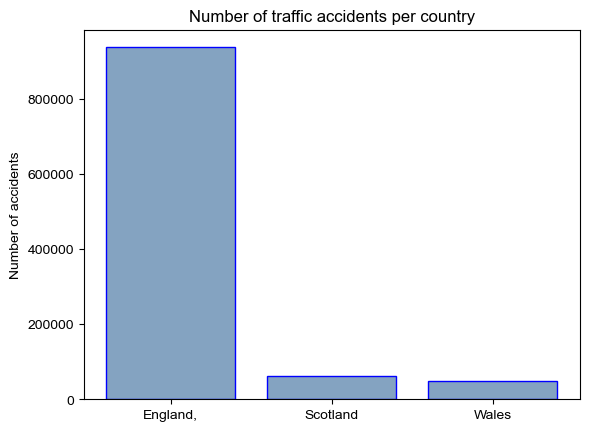

In [65]:
# Distribution of accidents in Great Britain
count_s = len(df1[df1['InScotland'] == 'Yes'])
count_w = len(df1[df1['Local_Authority'].isin(Wales_districts)])
count_e = len(df4)
x_ax = ['England,', 'Scotland', 'Wales']
y_ax = [count_e, count_s, count_w]

plt.bar(x_ax, y_ax,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.ylabel('Number of accidents')
plt.title('Number of traffic accidents per country')

As seen by this plot, the majority of our data is from England, supporting our decision to only look at traffic accidents in England.

Text(0.5, 1.0, 'Number of traffic accidents per age range')

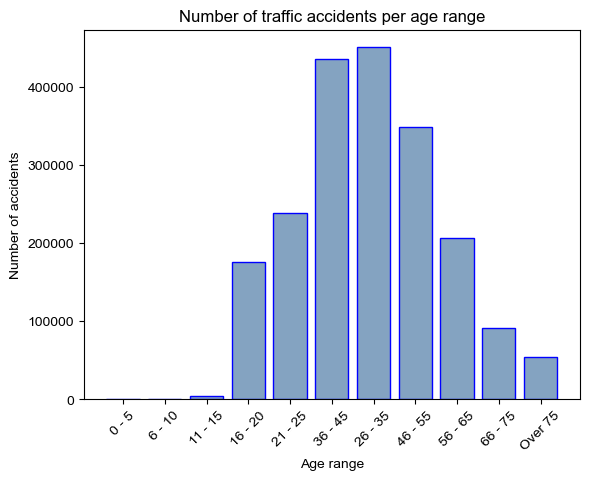

In [66]:
df_age = df2['Age_Band_of_Driver'].value_counts()
df_age = df_age.to_frame().reset_index()
df_age = df_age[df_age['index'] != 'Data missing or out of range']
df_age['order'] = [6,5,7,4,8,3,9,10,2,1,0]
df_age = df_age.sort_values('order', ascending = True)
plt.bar(df_age['index'], df_age['Age_Band_of_Driver'],color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(rotation = 45);
plt.ylabel('Number of accidents')
plt.xlabel('Age range')
plt.title('Number of traffic accidents per age range')

This plot shows us the distribution of the drivers’ ages. For the most part it looks quite predictable. People of the age 26-55 are likely to be car owners, therefore ending up in more traffic accidents. It is strange that the dataset includes children, since it only describes the driver and not passengers, but there are actually very few entries in the age gaps ranging from 0-15.

Text(0.5, 1.0, 'Car brands with the most accidents')

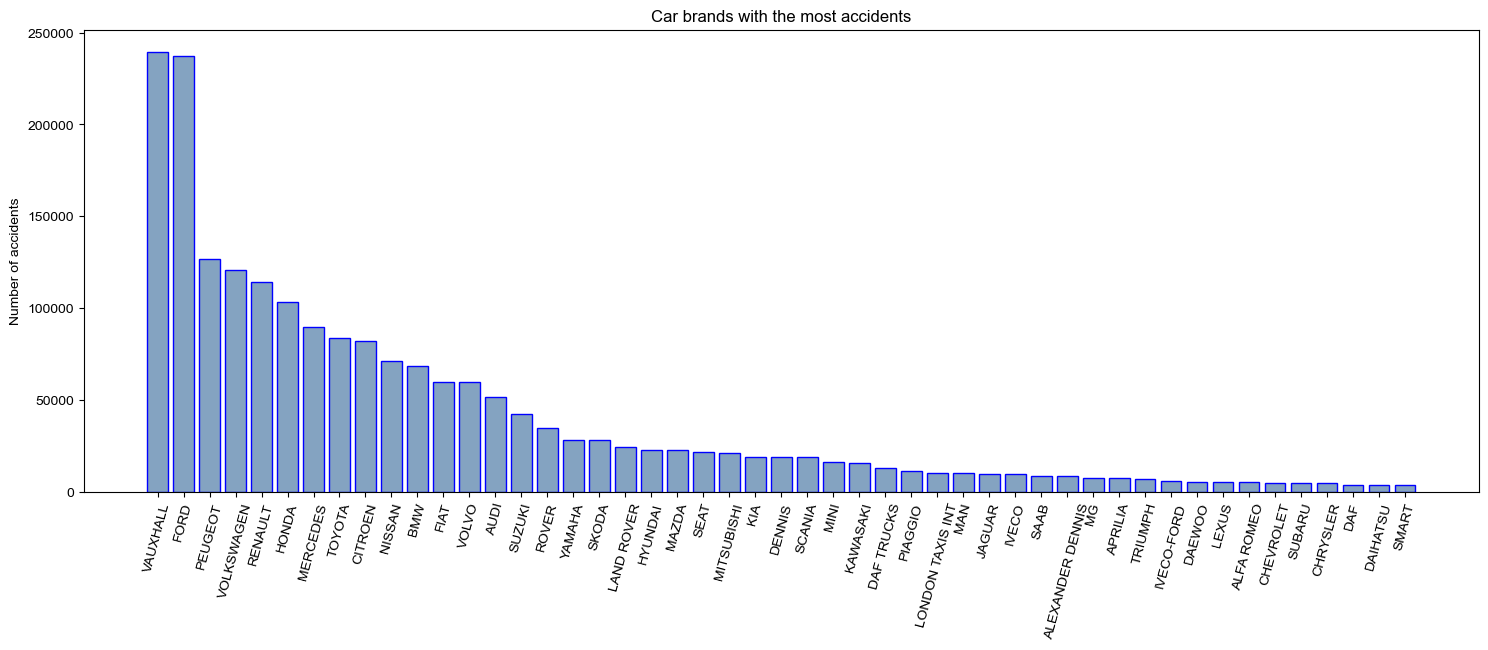

In [67]:
df_brand = df2['make'].value_counts()
df_brand = df_brand.to_frame().reset_index().rename(columns={'make' : 'Count'})
df_brand = df_brand.rename(columns={'index' : 'Brand'}).sort_values('Count', ascending=False)
df_brand = df_brand[df_brand['Count'] > 3000]
plt.figure(figsize=(18, 6))
plt.bar(df_brand['Brand'], df_brand['Count'],color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(rotation = 75);
plt.ylabel('Number of accidents')
plt.title('Car brands with the most accidents')

The bar chart displays the brands of the vehicles involved in the traffic accidents. It is clear that there are certain brands, which are more prevalent in the dataset than others. However, this is expected since these brands are also among the best selling car brands in England [3].

Text(0.5, 1.0, 'Number of accidents for each gender')

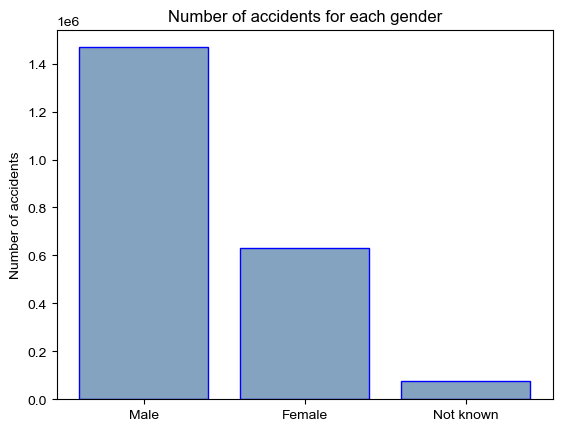

In [68]:
df_gen = df2['Sex_of_Driver'].value_counts()
df_gen = df_gen.to_frame().reset_index().rename(columns={'Sex_of_Driver' : 'Count'})
df_gen = df_gen.rename(columns={'index' : 'Gender'})
df_gen = df_gen[df_gen['Gender'] != 'Data missing or out of range']
plt.bar(df_gen['Gender'], df_gen['Count'],color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.ylabel('Number of accidents')
plt.title('Number of accidents for each gender')

The distribution of gender clearly demonstrates that there are more accidents where the driver was male as opposed to female. It is a known fact that there are more men involved in traffic accidents and traffic offenses in general, which a quick internet browse confirms [4].

Text(0.5, 1.0, 'Number of accidents per weekday')

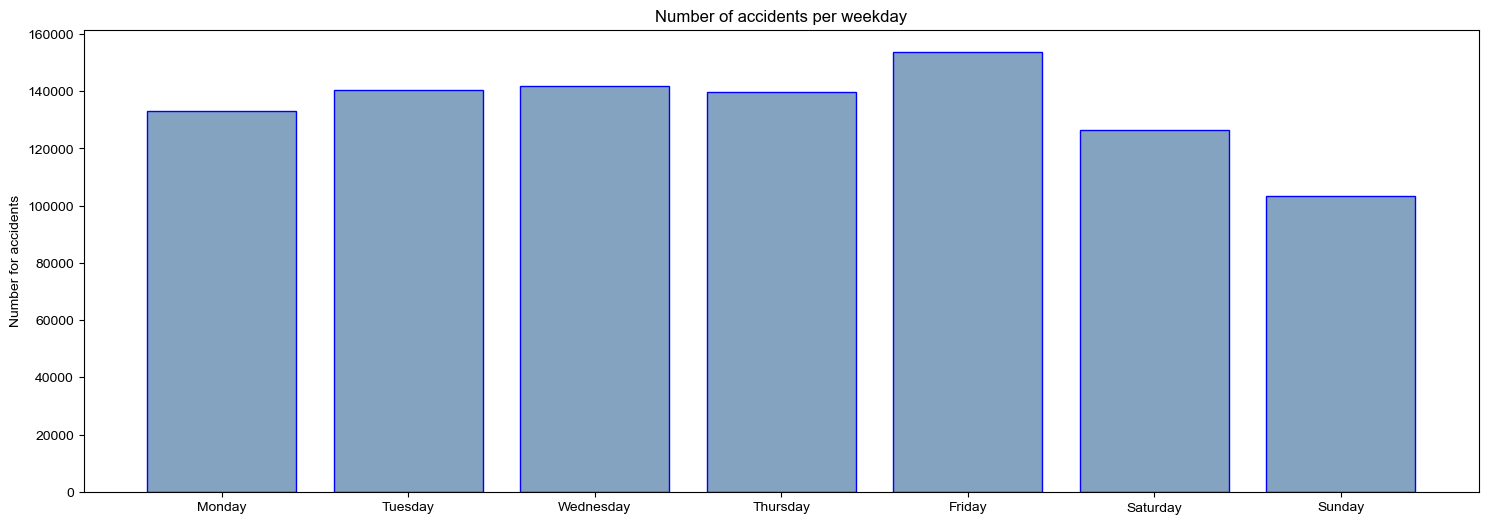

In [69]:
df_day = df4['Day_of_Week'].value_counts()
df_day = df_day.to_frame().reset_index().rename(columns={'Day_of_Week' : 'Count'})
df_day = df_day.rename(columns={'index' : 'Day_of_Week'})
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day['Day_of_Week'] = pd.Categorical(df_day['Day_of_Week'], categories=weekdays)
df_day = df_day.sort_values('Day_of_Week')

plt.figure(figsize=(18, 6))
plt.bar(df_day['Day_of_Week'], df_day['Count'],color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.ylabel('Number for accidents')
plt.title('Number of accidents per weekday')

This time series plot tells us that the weekday with the most traffic accidents is Friday, whereas the day with the least accidents is Sunday. However, the differences between the days are very slight.


Text(0.5, 1.0, 'Number of accidents for each year between 2005-2010')

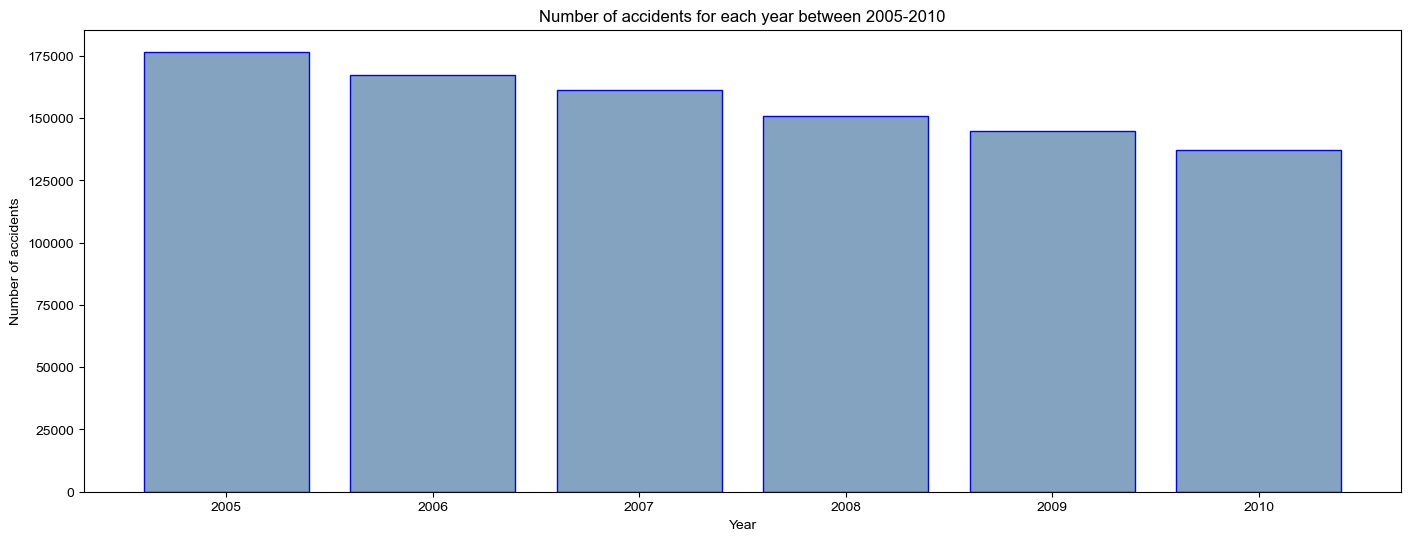

In [70]:
df_year = df4['Year'].value_counts()
df_year = df_year.to_frame().reset_index().rename(columns={'Year' : 'Count'})
df_year = df_year.rename(columns={'index' : 'Year'})
df_year = df_year.sort_values('Year')

plt.figure(figsize=(17, 6))
plt.bar(df_year['Year'], df_year['Count'],color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.ylabel('Number of accidents')
plt.xlabel('Year')
plt.title('Number of accidents for each year between 2005-2010')

The number of traffic accidents is steadily decreasing year by year according to this time series plot. There is not one year which stands out as having an unexpected amount of accidents, as they all follow a decreasing pattern.

# Data Analysis

## Choropleth map

In [71]:
# define dataframe which counts the number of accidents for each local authority
view1 = df4.groupby('Local_Authority')['Accident_Index'].count()
view1 = view1.reset_index()
view1 = view1.rename(columns={'Accident_Index':'Count'})

In [ ]:
# create choropleth map
districts = px.choropleth_mapbox(view1, geojson=data, locations='Local_Authority', featureidkey="properties.name",
                           color='Count',
                           color_continuous_scale="matter",
                           range_color=(0, 14000),
                           mapbox_style="carto-positron",
                           zoom=5, center={"lat": 53, "lon": 0.1167},
                           opacity=0.5,
                           )


# show choropleth map
districts.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
districts.show()


In [73]:
#districts.write_html("choropleth.html")

NOTE: The choropleth map is not shown here as it takes up too much space. It is visible on the webpage.
The choropleth map clearly shows that the districts Manchester, Leeds, and Birmingham have the highest number of traffic accidents across all the districts. This tells us that the number of traffic accidents could correlate with population. It also seems that larger districts tend to have slightly higher occurrences of accidents than smaller districts, e.g. the district of Cornwall is one of the districts with the most accidents.


## 10 biggest cities

In [74]:
# define list of the 10 biggest cities by population from [5]
cities = ['London', 'Birmingham', 'Manchester', 'Liverpool', 'Leeds', 'Sheffield', 'Teesside', 'Bristol', 'Bournemouth and Poole', 
          'Stoke-on-Trent']

In [75]:
# create new lists of local authorities within the 10 biggest cities

greater_london = ['City of London','Westminster','Kensington and Chelsea','Hammersmith and Fulham','Wandsworth','Lambeth','Southwark',
                  'Tower Hamlets','Hackney','Islington','Camden','Brent','Ealing','Hounslow','Richmond upon Thames','Kingston upon Thames',
                  'Merton','Sutton','Croydon','Bromley','Lewisham','Greenwich','Bexley','Havering','Barking and Dagenham','Redbridge','Newham',
                  'Waltham Forest','Haringey','Enfield','Barnet','Harrow','Hillingdon']
birmingham = ['Birmingham','Wolverhampton','Dudley','Walsall','Sandwell','Solihull']
manchester = ['Manchester','Salford','Tameside','Trafford','Bury','Oldham','Stockport']
liverpool = ['Liverpool','Knowsley','St. Helens']
leeds = ['Leeds']
sheffield = ['Sheffield','Rotherham']
teesside = ['Middlesbrough','Redcar and Cleveland','Stockton-on-Tees']
bristol = ['Bristol, City of']
Bournemouth_and_Poole = ['Bournemouth','Christchurch','Poole']
Stoke_on_Trent = ['Stoke-on-Trent','Newcastle-under-Lyme']

In [76]:
# make a list of lists
authorities = [[greater_london],[birmingham],[manchester],[liverpool],[leeds],[sheffield],[teesside],[bristol],[Bournemouth_and_Poole],
               [Stoke_on_Trent]]
               
# define count variable
count=-1

# append the new local authorities to the dataframe
for j in cities:
    count+=1
    view1.loc[len(view1.index)] = [j,view1[view1['Local_Authority'].isin(authorities[count][0])]['Count'].sum()]

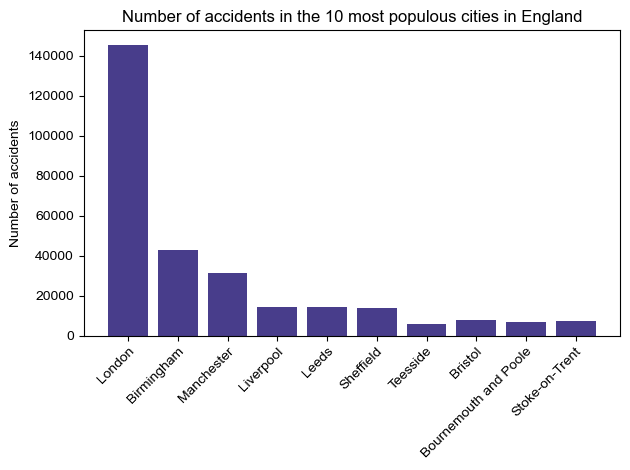

In [77]:
# create barchart of the 10 biggest cities by population
plt.bar(view1['Local_Authority'].tail(10), view1['Count'].tail(10),color='darkslateblue')
plt.xticks(rotation = 45, ha='right', rotation_mode="anchor");
plt.ylabel('Number of accidents')
plt.title('Number of accidents in the 10 most populous cities in England');
plt.tight_layout()
#plt.savefig('Cities.png')

The bar plot of the 10 cities reviels that London is by far the city with the most accidents. This corresponds to our earlier assumption that larger populations correlate with more traffic accidents. Otherwise the bar plot seems to confirm what we saw in the choropleth map.

## 2d Histogram

In [78]:
# define new dataframe for 2d histogram
view2 = df4
# exclude entries where latitude and longitude are not provided
view2 = view2[view2['Longitude'].notna()]

In [79]:
# define haversine function
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [80]:
# investigate the latitudes and longitudes which incapsulate England
lat_min = view2.Latitude.min()
lat_max = view2.Latitude.max()
lon_min = view2.Longitude.min()
lon_max = view2.Longitude.max()

In [81]:
# find estimated number of bins
print(f"Estimated bin amount along the western border of England: {haversine(lon_min, lat_min, lon_min, lat_max)}") 
print(f"Estimated bin amount along the eastern border of England: {haversine(lon_max, lat_min, lon_max, lat_max)}")
print(f"Estimated bin amount along the northern border of England: {haversine(lon_min, lat_max, lon_max, lat_max)}")
print(f"Estimated bin amount along the southern border of England: {haversine(lon_min, lat_min, lon_max, lat_min)}")

Estimated bin amount along the western border of England: 655.1271493117467
Estimated bin amount along the eastern border of England: 655.1271493117467
Estimated bin amount along the northern border of England: 504.6087299378352
Estimated bin amount along the southern border of England: 578.2255086542273


In [82]:
# 655x579 bins are needed to get bins of around 1000x1000m
count, lon, lat = np.histogram2d(view2.Latitude, view2.Longitude, bins = [655,579])

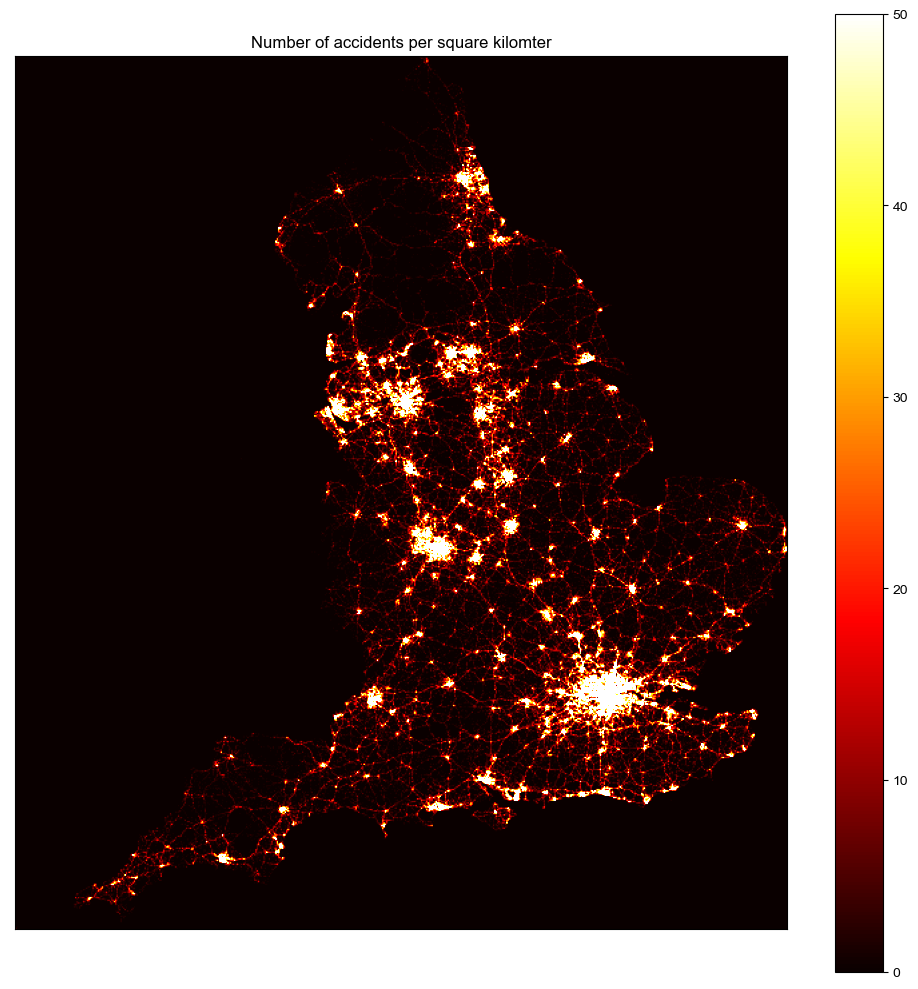

In [83]:
# create and show 2d histogram
plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=50, origin='lower')
plt.colorbar();
plt.title('Number of accidents per square kilomter')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('2DHistogram.png')

The 2D histogram visualizes the density of the traffic accidents in our dataset on the map of England. Here, we are able to see the bigger roads and both larger and smaller cities in England. This plot specifically tells us that most accidents happen within smaller areas. Even the districts with fewer accidents have a lit up spot in the 2D histogram. We see that rather than population, it is population density which correlates with traffic accidents.


## Road data

In [84]:
# Define new dataframe only consisting of road class and number
view3 = df4[['1st_Road_Class', '1st_Road_Number', 'Accident_Severity']]
view3 = view3.dropna()
view3['1st_Road_Number'] = view3['1st_Road_Number'].astype('int64').astype(str)

In [85]:
# Dateframe with number of accidents for each road class
view4 = view3['1st_Road_Class'].value_counts()
view4 = view4.to_frame().reset_index().rename(columns={'1st_Road_Class' : 'Count'})
view4 = view4.rename(columns={'index' : 'Road Class'}).sort_values('Count', ascending=False)

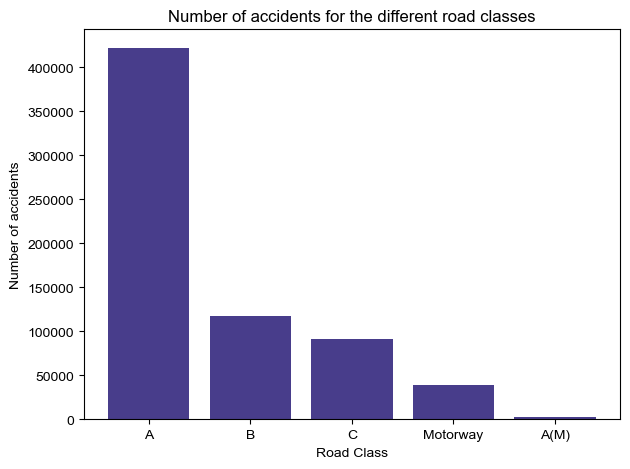

In [86]:
# Bar chart with number of accidents for each road class
plt.bar(view4['Road Class'], view4['Count'],color='darkslateblue')
plt.xlabel('Road Class')
plt.ylabel('Number of accidents')
plt.title('Number of accidents for the different road classes');
plt.tight_layout()
plt.savefig('RoadClasses.png')

This plot displays that the majority of accidents happen on roads which are of class A. The predominant number of accidents on A class roads might lead us to think that there are many more roads of this class than the other. Or, given our assumption that high population density correlates to many traffic accidents, the A roads might be the ones which are located in population dense areas.


In [87]:
# Dataframe for only class A, since it clearly has the most accidents
view5 = view3.copy()
view5.drop(view5[view5['1st_Road_Class'] != 'A'].index, inplace=True)
view5['Road'] = view5['1st_Road_Class'] + view5['1st_Road_Number'] # Full name of road

In [88]:
# Count number of accidents for each A-road and look at top 30
view6 = view5['Road'].value_counts()
view6 = view6.to_frame().reset_index().rename(columns={'Road' : 'Count'})
view6 = view6.rename(columns={'index' : 'Road Name'}).sort_values('Count', ascending=True)
view6 = view6.tail(30)

# Length of each road (top 30)
Road_km = [454.0, 225.3, 85.6, 199.6, 309.0, 115.0, 175.4, 120.7, 41.4, 344.4, 107.8, 235.0, 196.3, 172.2, 191.2, 145.5, 67.1, 
           457.1, 190.7, 115.8, 391.1, 108.0, 422.0, 85.0, 251.4, 328.3, 659.8, 203.8, 469.9, 453.8]

# Add length to dataframe
view6['Length'] = Road_km

# Add length divided by number of accidents to dataframe
CountByLength = view6['Count'] / view6['Length']
view6['CountByLength'] = CountByLength.round(decimals=1)

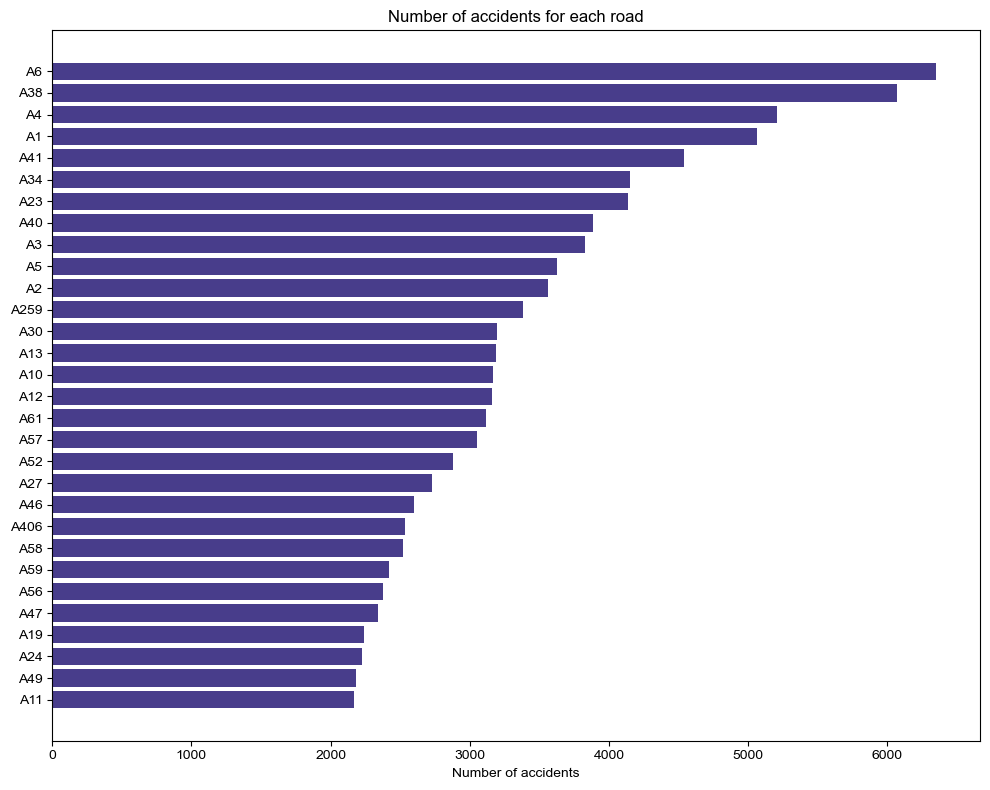

In [89]:
# Bar chart showing number of accidents for each road (top 30)
plt.figure(figsize=(10, 8))
plt.barh(view6['Road Name'], view6['Count'],color='darkslateblue')
plt.title('Number of accidents for each road')
plt.xlabel('Number of accidents')
plt.tight_layout()
plt.savefig('Top30Roads.png')

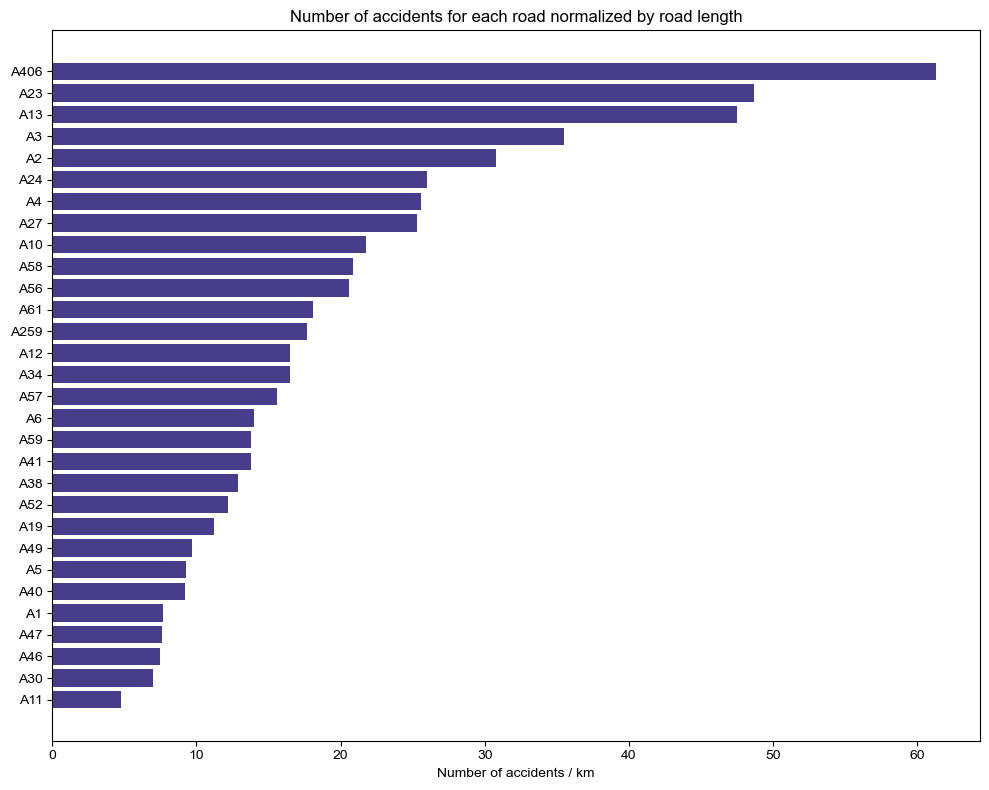

In [90]:
# Bar chart showing number of accidents divided by length for each road 
view6 = view6.sort_values('CountByLength', ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(view6['Road Name'], view6['CountByLength'],color='darkslateblue')
plt.title('Number of accidents for each road normalized by road length');
plt.xlabel('Number of accidents / km');
plt.tight_layout()
plt.savefig('Top30RoadsNorm.png')

The two bar plots above show that some roads might be more dangerous than others when it comes to traffic accidents. Furthermore, we see that the road length is a factor when it comes to the number of accidents. From the first plot we would therefore not conclude that the top roads are more dangerous, but simply longer, which makes them more likely to be the place of an accident.


## Interactive plot

In [91]:
# interactive plotting
pd.options.plotting.backend = 'holoviews'

# removing errors in Accident_Index
freqlist = df4.Accident_Index.value_counts()
mt1 = freqlist[freqlist>1].index.tolist()
df_final_uniq_list = df4[~df4['Accident_Index'].isin(mt1)].Accident_Index.tolist()
df_final_uniq = df4[df4['Accident_Index'].isin(df_final_uniq_list)]
road_mapper = df_final_uniq.set_index('Accident_Index').to_dict()['Road']

# map road names to vehicle data
df2['road'] = df2.Accident_Index.map(road_mapper)

# top 800 most freqeuent roads (due to minimizing the html file in the end)
dfinteractive = df2[df2['road'].isin(df2['road'].value_counts().head(800).index.tolist())]

# order age-band
age_levels = list(dfinteractive.Age_Band_of_Driver.unique())
age_levels.remove('Data missing or out of range')
order=[9,8,4,6,1,0,2,5,3,7]
age_levels=[age_levels[i] for i in order]

# sort road names
road_choices = list(dfinteractive.road.unique())
road_choices = [x for x in road_choices if str(x) != 'nan']
road_choices = natsorted(road_choices)

# gender list
gender = ['Male','Female']

In [92]:
# bar plot function
def bplot(veje,gender,agelvl,**kwargs):
    out_plot = dfinteractive[(dfinteractive['road'] == veje) & (dfinteractive['Sex_of_Driver'] == gender) & (dfinteractive['Age_Band_of_Driver'] == agelvl)].iloc[:,18].value_counts()

    return out_plot.hvplot(kind='bar',
                title='Be aware of these vehicle manoeuvres when you are out on your trip!', 
                rot=45, 
                c='Vehicle_Manoeuvre', colorbar=True, 
                colormap='RdYlGn_r', 
                shared_axes=False).opts(framewise=True)


In [93]:
# interactive plot
dmap = hv.DynamicMap(bplot, kdims=['Veje','Gender','Agelvl'])
dmap = dmap.redim.values(Veje=road_choices, Gender=gender,Agelvl=age_levels)
road_choice = pn.widgets.Select(name='Please choose which road to investigate',options=road_choices)
sex_choice = pn.widgets.Select(name='Please choose your gender',options=gender)
age_level = pn.widgets.DiscreteSlider(name='Use the slider to choose your age range',value=age_levels[3],options=age_levels)
dmap = hv.DynamicMap(pn.bind(bplot, veje=road_choice, gender=sex_choice,agelvl=age_level))
app = pn.Row(pn.WidgetBox('# Pick your parameters below!', age_level, sex_choice,road_choice),dmap).servable()
app
#app.save("dashboard.html",embed=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'b89755d2-bb03-477e-8d28-c6e47c043795': {'defs': …

Row
    [0] WidgetBox
        [0] Markdown(str)
        [1] DiscreteSlider(name='Use the slider t..., options=['6 - 10', '11 - 15', ...], value='21 - 25')
        [2] Select(name='Please choose y..., options=['Male', 'Female'], value='Male')
        [3] Select(name='Please choose w..., options=['A1', 'A2', 'A3', ...], value='A1')
    [1] HoloViews(DynamicMap)

The interactive plot tells us that the majority of accidents happen during the maneuver “Going ahead”. Also, the maneuvers “slowing or stopping” and “turning right” are on top for many of the roads. There is a trend in the maneuvers which occur before an accident. However, we cannot know whether it is the maneuver which directly causes the accident. The interactive plot also clearly demonstrates that there is a clear difference between the genders male and female as well as the age ranges.
Below is another version of the interactive plot, which enables multiselection of gender and road. This was not used on the webpage (further explained in the visualization section)

In [94]:
# order age-band
age_levels = list(df2.Age_Band_of_Driver.unique())
age_levels.remove('Data missing or out of range')
order=[10,9,8,5,4,0,2,3,6,1,7]
age_levels=[age_levels[i] for i in order]

# sort road names
road_choices = list(df2.road.unique())
road_choices = [x for x in road_choices if str(x) != 'nan']
road_choices = natsorted(road_choices)

# creating filter options
age_level = pn.widgets.DiscreteSlider(name='Use the slider to choose your age range',value=age_levels[3],options=age_levels)
sex_choice = pn.widgets.MultiSelect(name='Please choose your gender',value=['Male','Female'],options=['Male','Female'])
road_choice = pn.widgets.MultiSelect(name='Please choose which roads to investigate',value=['A41'],options=road_choices,size=20)

# Create interactive dataframe
idf = df2.interactive(loc='left')

# plot
interactive_plot = idf.loc[(idf['Age_Band_of_Driver'] == age_level) & (idf['Sex_of_Driver'].isin(sex_choice)) & (idf['road'].isin(road_choice))].iloc[:,18].value_counts()
inter_plot = interactive_plot.hvplot(kind='bar',
               title='Be aware of these vehicle manoeuvres when you are out on your trip!', 
               rot=45, 
               c='Vehicle_Manoeuvre', colorbar=True, 
               colormap='RdYlGn_r', 
               shared_axes=False,width=1200, height=500)
inter_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'cf004610-18ad-45de-bb1c-b5ed64dc4ef2': {'defs': …

# Genre

For the genre, we chose the magazine style. It made sense because we wanted to tell a continuous story, which grabs the reader and guides them through a myriad of discoveries. We thought that the best way to do this would be to embed all of our figures in describing text. As for the visual narrative, we put an emphasis on keeping a consistent visual platform across all visualizations by using the same color palette (purple-red) and text fonts. The only exception is the last interactive plot, however, this plot in itself is consistent, because when the reader uses different filters, the colors and layout stays the same. For highlighting, we mostly used colors to draw the reader’s attention to the most important aspects of the figures. Some examples are the 2D histogram where the cities with the most accidents are clearly highlighted with bright colors on a black background, and the choropleth map where districts with a higher number of traffic accidents are separated from the rest with a darker color. We did not use any transition guidance since these visual narratives are mostly used in films and videos. The narrative structure is characterized by user-directed and linear ordering. This is expressed in the interactive plot, where the reader can select a path among many alternatives, and in the choropleth map where the user is prompted to zoom in on the London area. The interactive plot features multiple forms of filtering and selecting, whereas the choropleth map facilitates navigating around the map. Both figures have explicit instructions on how to use them. The messaging consists of captions and headlines on all figures along with accompanying text which describes what the user is supposed to notice [6].

# Visualizations

Since our dataset has much geographical information we chose to show this in a variety of different ways. We started out with the choropleth map to give the reader an overview of the geographical data and show the number of accidents across the local authority districts. However, we also wanted to show the reader that this type of map can be a bit deceiving. A bar plot is a good visualization when we want to compare different quantities directly, as we wished to do with the city data [7]. The bar plot clearly showed the difference in the number of accidents across the big cities. Finally, we chose to show a 2D histogram, so that the reader has a chance to see the density of traffic accidents and enable them to reflect on the different ways to see a map.

After looking at the data on a more national scale, we wanted to zoom in and look at specific roads. We chose to show the road data in barplots, since this section was mostly about comparing the roads to one another. Again, bar plots are a good way for the reader to be able to compare the number of traffic accidents across the different roads. The plots are sorted, enabling the reader to very easily compare and rank the different roads. We chose to tilt the plots so the number of accidents is on the x-axis. This was simply to make the road names more readable since there are many of them.

Finally, we have chosen an interactive plot, which is also rooted in a bar plot. Our dataset has many categorical attributes, which is very suitable for a bar plot. The original idea was to have a slider for the age variable and enable multiselection for the road and the gender variables. This way, the reader could get an overview of all roads in their area. However, since this was very computationally heavy we made the road and gender variables single selection with a drop-down menu. Both versions are shown in the code, but only one appears in the web page.


# Discussion

Overall we found that the dataset contained some interesting explorative aspects which are eligible for a cohesive data story. However, some parts of our data handling might impact how our data is visualized. 

Firstly, when we merge the accident data and the vehicle data, we significantly decrease the size of the dataset. This is because the entries of the accident dataset and vehicle dataset do not correspond completely. The merged data frame is only used in the interactive plot. This means that the number of accidents shown on a specific road in the interactive plot does not necessarily correspond to that on the barplot in figure 5. We could have chosen to use the merged data frame for all of our data visualizations. However, we chose not to do this, since we would lose a lot of data, and it would not be an accurate representation of where accidents happen the most, which is what we wanted to explore. 

Another fact about the dataset which has impacted our visualizations is the lack of continuous, numerical attributes. The dataset almost exclusively contains categorical data, which decreases our opportunity to perform a variety of explorative operations.

Something we had to be very aware of when exploring this dataset was the heavy presence of trends. There is not a huge variation in each entry which has forced us to be very aware of drawing wrong conclusions. For example, the vast majority of traffic accidents have happened under the weather condition “Fine no high winds”. The conclusion here is probably not that traffic accidents correlate with calm weather, but rather that this is the most common weather condition.


# Contributions

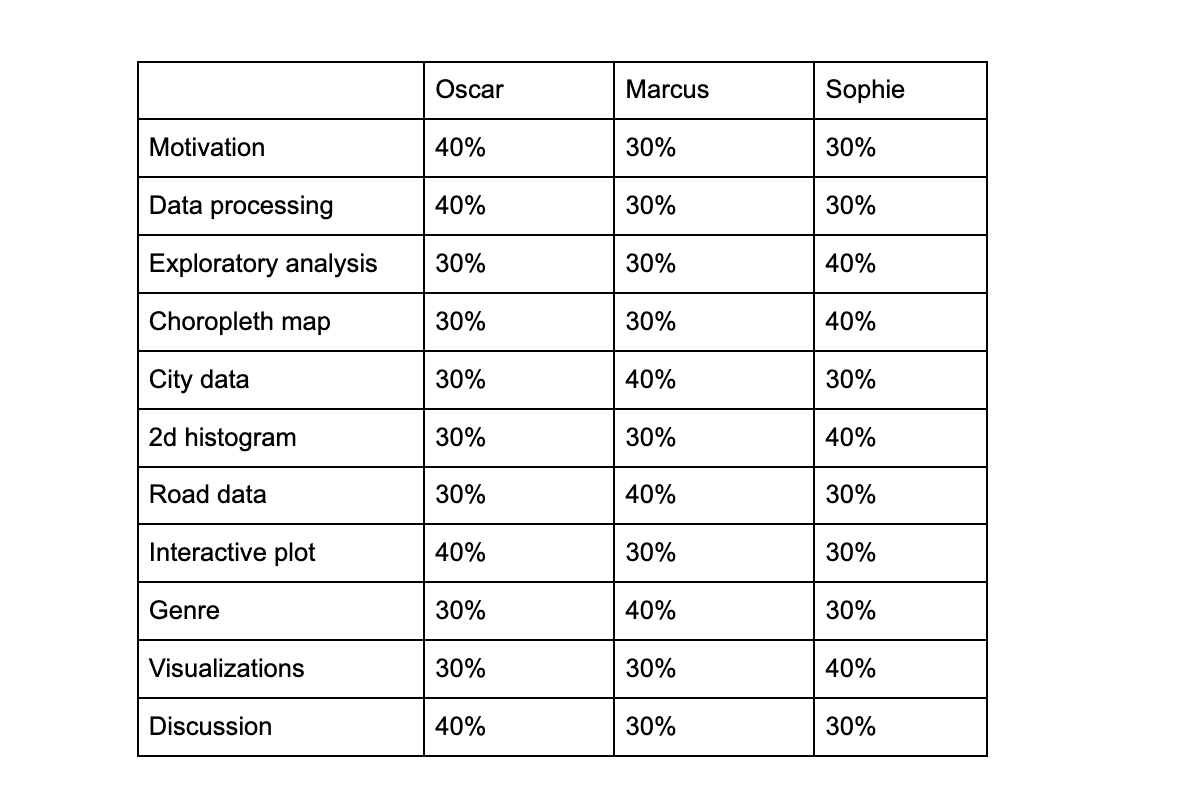

# References

[1] Thanasis, “UK Road Safety: Traffic Accidents and Vehicles”, 2017, kaggle.com, accessed on: 12-05-2023, https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles?datasetId=43428&sortBy=voteCount

[2] Office for National Statistics, “Local authority district”, 2023, planning.data.gov.uk, accessed on: 12-05-2023, https://www.planning.data.gov.uk/dataset/local-authority-district

[3] Car Sales Statistics, “2022 (Full Year) Britain: Best-Selling Car Brands in the UK”, 2023, best-selling-cars.com, accessed on: 12-05-2023, https://www.best-selling-cars.com/britain-uk/2022-full-year-britain-best-selling-car-brands-in-the-uk/

[4] Rosenfeld, Jonathan, “Do Men Or Women Get In More Car Accidents?”, 2022, rosenfeldinjurylawyers.com, accessed on: 12-05-2023, https://www.rosenfeldinjurylawyers.com/news/do-men-or-women-get-in-more-car-accidents/

[5] Wikipedia, “List of primary urban areas in England by population”, 2023, wikipedia.org, accessed on: 20-05-2023, https://en.wikipedia.org/wiki/List_of_primary_urban_areas_in_England_by_population

[6] Segel, Edward, “Narrative Visualization: Telling Stories with Data”, IEEE Xplore, 2010, http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf

[7] Lehmann, Sune, “Visualization 2”, 2017, youtube.com, accessed on: 12-05-2023, https://www.youtube.com/watch?v=zE6Nr8trdrw&ab_channel=SuneLehmann